In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
netflix_is =pd.read_csv('mymoviedb.csv', lineterminator='\n')


In [4]:
netflix_is.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
netflix_is.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


In [6]:
netflix_is.duplicated().sum()



np.int64(0)

In [7]:
netflix_is.describe()


,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
# genre column has spaces between two strings which has to be removed,
# Release_date column format has to be changed to datetime formart,
# no need of columns such as overview, official language, poster url ,
# no null values in data frame


In [8]:
netflix_is['Release_Date']=pd.to_datetime(netflix_is['Release_Date'])

In [9]:
netflix_is['Release_Date'].dtypes

dtype('<M8[ns]')

In [10]:
netflix_is.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [11]:
# getting year from the release_date column
netflix_is['Release_Date']=netflix_is['Release_Date'].dt.year

In [12]:
netflix_is['Release_Date'].dtypes

dtype('int32')

In [13]:
netflix_is.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


In [24]:
cols=['Overview','Original_Language','Poster_Url']

In [25]:
#  droping (no use columns)
df=netflix_is.drop(cols,axis=1)

In [26]:
df.head(3)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller


In [27]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [28]:
#  splitting the genre column with comma
df['Genre']=df['Genre'].str.split(', ')

In [29]:
df=df.explode('Genre').reset_index(drop=True)

# What is the most frequent genre of movies released on Netflix

In [30]:
df['Genre']=df['Genre'].astype('category')

In [81]:
df.dtypes

Release_Date       int32
Title             object
Popularity       float64
Vote_Count         int64
Vote_Average     float64
Genre           category
dtype: object

Text(0.5, 1.0, 'genre count distribution')

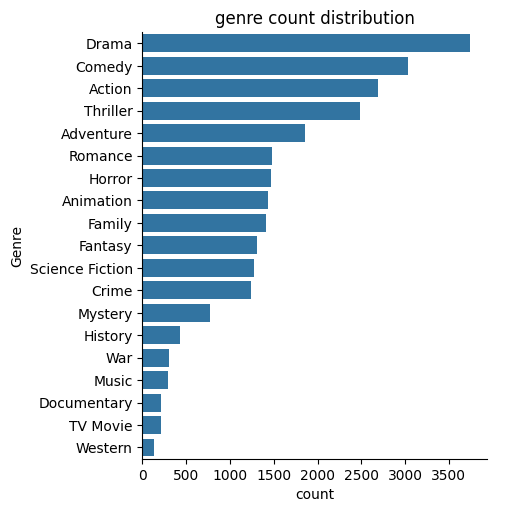

In [31]:
sns.catplot(data=df,y='Genre',kind='count',order=df['Genre'].value_counts().index )
plt.title('genre count distribution')

# What movie got the highest popularity? what's its genre?


In [38]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


# What movie got the lowest popularity? what's its genre?


In [39]:

df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,6.7,History
25790,1984,Threads,13.354,186,7.8,War
25791,1984,Threads,13.354,186,7.8,Drama
25792,1984,Threads,13.354,186,7.8,Science Fiction


# Which year has the most filmmed movies?



In [15]:
netflix_is.groupby('Release_Date')['Title'].count().sort_values(ascending=False)

Release_Date
2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1920      1
1930      1
1929      1
1925      1
2024      1
Name: Title, Length: 102, dtype: int64

In [16]:
year_count= netflix_is['Release_Date'].value_counts().sort_values(ascending=False).head(5)

Text(0.5, 1.0, 'no.of movies released in a year')

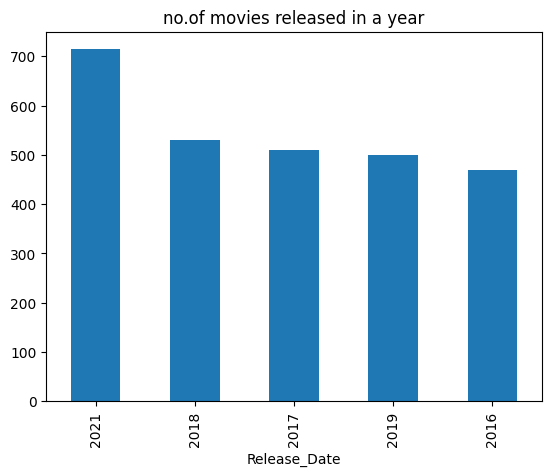

In [17]:
year_count.plot(kind='bar')
plt.title('no.of movies released in a year')

In [ ]:
#project ends